# Лабораторная работа 4
*********
##  Кластеризация методом k-средних.

На этом занятии компьютерного практикума предстоит изучить кластеризацию методом k-средних и применить данный метод для сжатия изображения. Прежде чем приступить собственно к программированию, настоятельно рекомендуется ознакомиться с материалом лекций, а также с дополнительными материалами, имеющими отношение к задаче кластеризации методом k-средних.

In [ ]:
# импортирую все нужные билиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import math
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import scipy.io

В этом упражнении предстоит изучить как, собственно, сам метод k-средних, так и  применить его для сжатия изображений. В первой части Вы применяете метод k-средних для обработки 2-мерного набора данных, что способствует лучшему пониманию алгоритма. Далее, метод k-средних применяется для сжатия изображения, посредством уменьшения количества цветов и сохранения только тех цветов, которые встречаются в данном изображении чаще всего.

##  Часть 1: Нахождение ближайших центроидов

In [ ]:
mat = scipy.io.loadmat('ex4data.mat')
x = mat['X']

In [ ]:
def plotData(x):
    plt.figure(figsize=(17,13))
    plt.scatter(x[:,0], x[:,1], s = 200, color = 'green',  marker = 'o',  alpha=0.5)
    plt.yticks(size = 15)
    plt.xticks(size = 15)
    plt.title('Визуализация данных', fontsize=20)

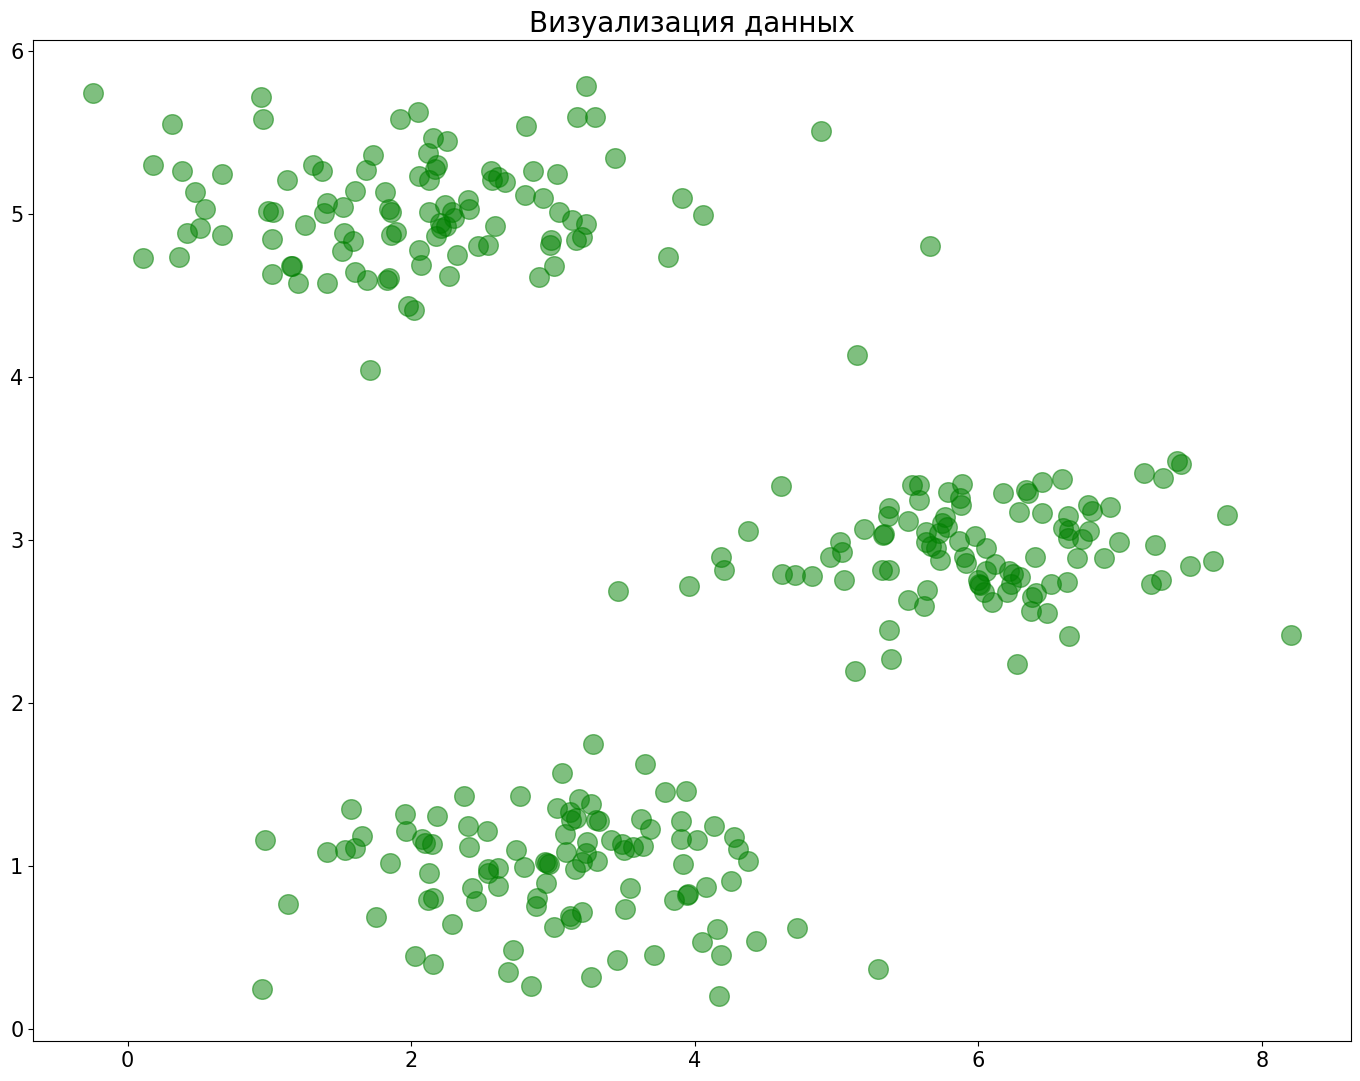

In [ ]:
plotData(x)

In [ ]:
def findClosestCentroids(X, centroids):
  '''
   Осуществите полный перебор набора данных, для каждого элемента
   набора данных найдите соответствующий ему ближайший центр,
   сохраните индекс в одномерном массиве idx.
   А именно, idx(i) должен содержать индекс
   ближайшего центра для произвольного примера i. Таким образом,
   диапазон значений в заполняемом массиве должен быть от 1 до K.
  '''
  K = centroids.shape[0]
  idx = np.zeros((X.shape[0], 1), dtype=np.int)
  m = X.shape[0]
  # Ваш код здесь

  return idx

In [ ]:
K = 3;
# 3 центроида
initial_centroids = np.array( [[3, 3], [6, 2], [8, 5]] )

# Нахождение ближайших центроидов для выбранных элементов
idx = findClosestCentroids(x, initial_centroids)

In [ ]:
print('Ближайшие центры для 3-х первых примеров:\n')
print(*idx[:3])

Ближайшие центры для 3-х первых примеров:

[0] [2] [1]


##  Часть2: Вычисление средних

Расчет средних значений центров

In [ ]:
def computeCentroids(X, idx, K):
  '''
  computeCentroids возвращает новые значения центров, формируемые в процессе
  итерационного уточнения положения среднего.
  Уточнение сводится к перегруппировке примеров (точек) к ближайшим центрам
  и последующему перерасчету местоположения центров.
  centroids = computeCentroids(X, idx, K) возвращает новые центры.
  В качестве входных данных выступает набор (матрица) X,
  каждая строка которого (которой) представляет собой отдельный пример, a
  вектор idx = m x 1 определяет индексы центров i-го примера
  (К - количество центров). Возвращаемой переменной является матрица
  центров, в которой каждая строка представляет собой конечное среднее центров.

  Указание:     Обрабатывайте каждый центр и вычисляйте среднее значение
                всех точек (примеров), которые ему соответствуют.
                Конкретнее, вектор-строка центров centroids(i, :)
                должен содержать среднее значение всех примеров,
                соответствующих центроиду i.
  '''
  m, n = X.shape
  centroids = np.zeros((K, n))
  # Ваш код здесь

  return centroids

In [ ]:
#  Вычислите средние значения центров, основываясь на центроидах, найденных
#  в предыдущей части.
centroids = computeCentroids(x, idx, K);

In [ ]:
centroids

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [ ]:
print('Перерасчет местоположения центров после нахождения ближайших центров: \n')
print('  ',centroids[0])
print('  ',centroids[1])
print('  ',centroids[2])
print('\nУказание: Ожидаемые значения центров\n')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Перерасчет местоположения центров после нахождения ближайших центров: 

   [2.42830111 3.15792418]
   [5.81350331 2.63365645]
   [7.11938687 3.6166844 ]

Указание: Ожидаемые значения центров

   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


##  Часть 3: Кластеризация на основе метода k-средних

Выполнение процедуры кластеризации методом k-средних на тестовом наборе данных.

In [ ]:
def drawLine(p1, p2):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], linewidth = 2, color='black')

In [ ]:
def hsv(n=63):
    from matplotlib import colors
    return colors.hsv_to_rgb(np.column_stack([np.linspace(0, 1, n+1), np.ones(((n+1), 2))]))

In [ ]:
def plotDataPoints(X, idx, K):

    palette = hsv( K )
    colors = np.array([palette[int(i)] for i in idx])

    # Plot the data
    plt.scatter(X[:,0], X[:,1], s=200, facecolors='none', edgecolors=colors)

    return

In [ ]:
def plotProgresskMeans(X, centroids, previous, idx, K, i):
    plotDataPoints(X, idx, K)
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=500, c='k', linewidth=5)
    for j in range(centroids.shape[0]):
        drawLine(centroids[j, :], previous[j, :])

    plt.title('Iteration number {:d} \n'.format(i+1), fontsize=20)
    return

In [ ]:
import sys
def runkMeans(X, initial_centroids, max_iters):

    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))

    plt.figure(figsize=(17,13))
    for i in range(max_iters):


        sys.stdout.write('\rK-Means iteration {:d}/{:d}...'.format(i+1, max_iters))
        sys.stdout.flush()

        idx = findClosestCentroids(X, centroids)

        plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
        previous_centroids = centroids

        centroids = computeCentroids(X, idx, K)

    return centroids, idx

K-Means iteration 10/10...
K-Means Done.



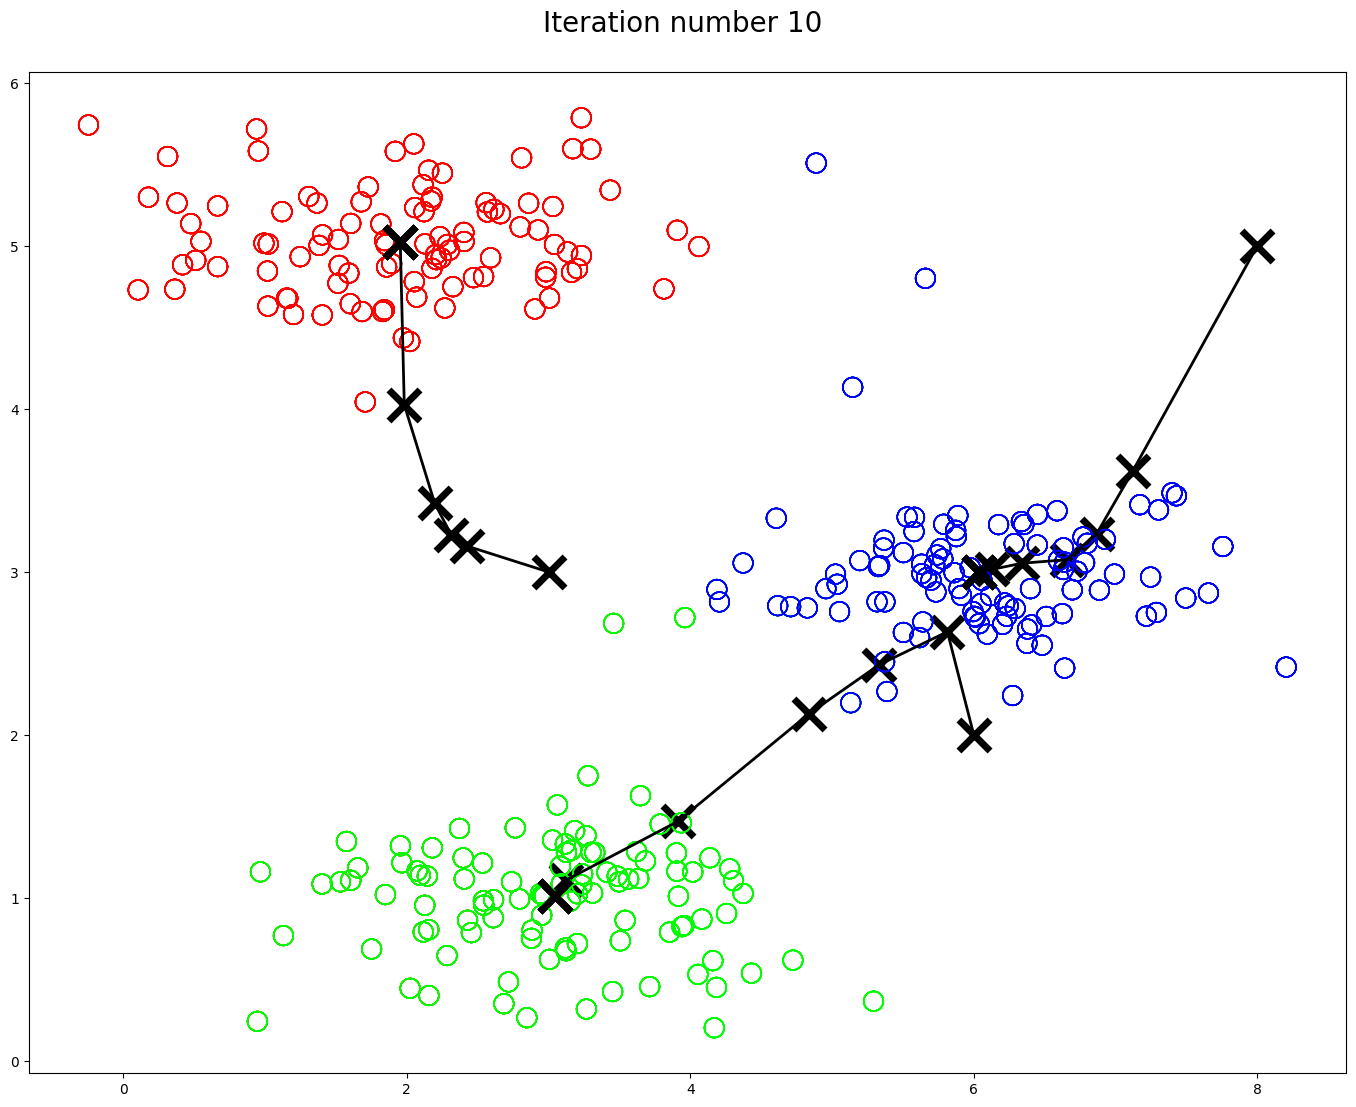

In [ ]:
# Начальные установки для реализации алгоритма
K = 3
max_iters = 10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

centroids, idx = runkMeans(x, initial_centroids, max_iters)
print('\nK-Means Done.\n')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters = 3, random_state = 42)
model.fit(x)

KMeans(n_clusters=3, random_state=42)

In [ ]:
model.labels_

array([1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1], d

In [ ]:
model.cluster_centers_

array([[3.04367119, 1.01541041],
       [1.95399466, 5.02557006],
       [6.03366736, 3.00052511]])

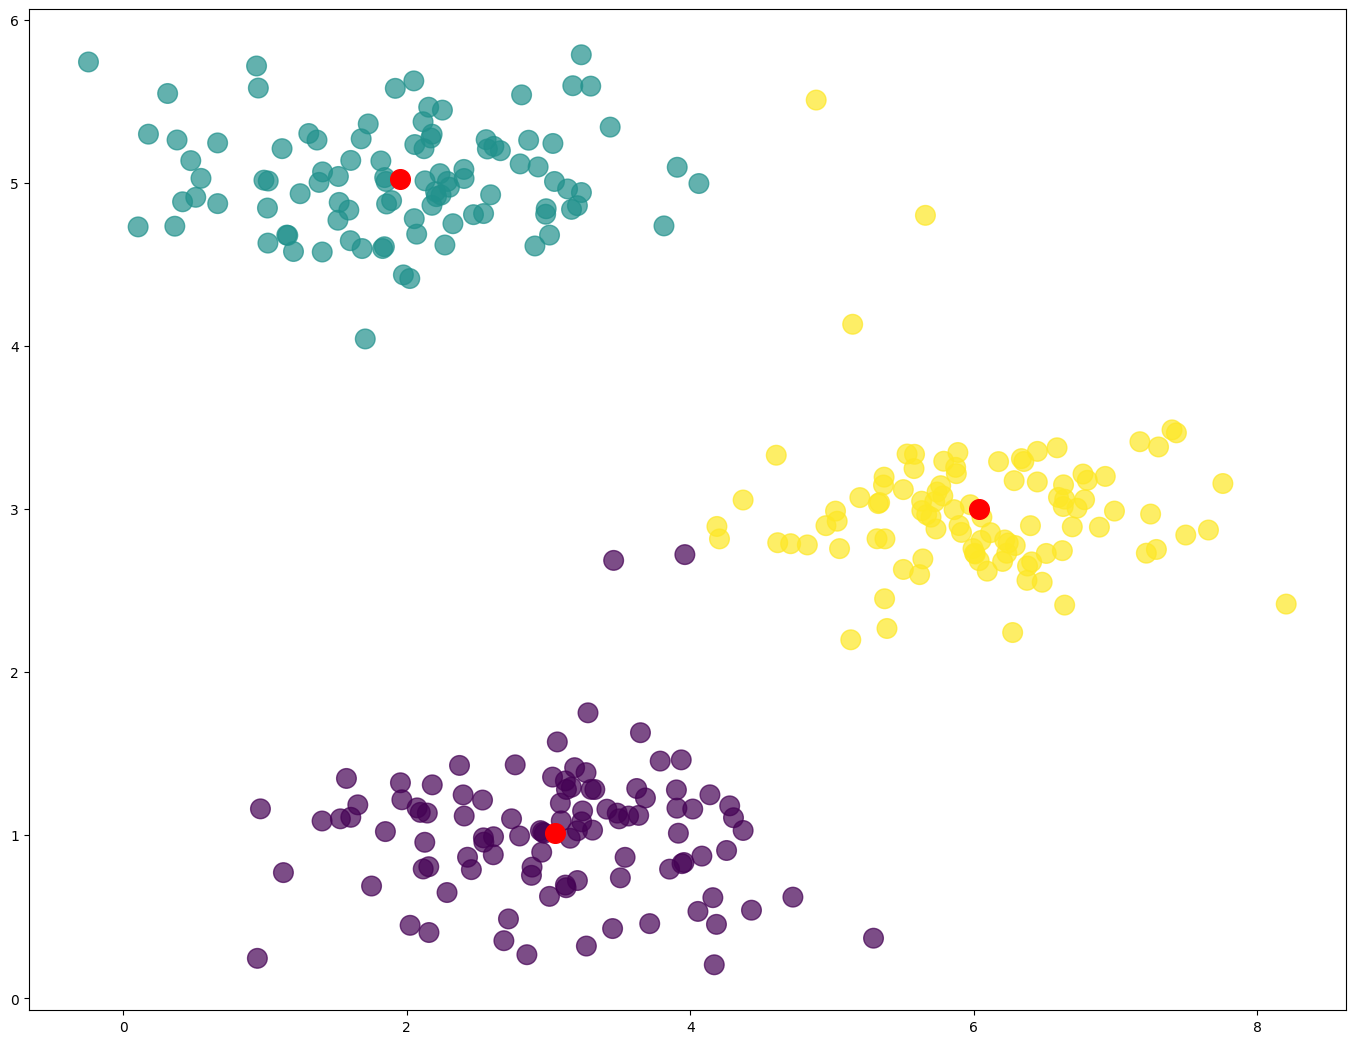

In [ ]:
plt.figure(figsize=(17,13))
plt.scatter(x[:,0],x[:,1], s = 200,  marker = 'o',  alpha=0.7, c=model.labels_)
plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1], s = 200, color='red',  marker = 'o')
plt.show()

In [ ]:
def kMeansInitCentroids(X, K):
  '''
  Указание: Установите центры случайным образом из набора Х.
  '''
  # Ваш код здесь

  return centroids

[[4.37249767 3.05488217]
 [3.23197916 4.93989405]
 [6.28438193 3.17360643]] 

K-Means iteration 10/10...[[5.36708111 3.19502552]
 [1.84207953 4.6075716 ]
 [2.04974595 5.6241395 ]] 

K-Means iteration 10/10...[[7.4949275  2.84018754]
 [5.57812294 3.24766016]
 [5.50295759 2.62924634]] 

K-Means iteration 10/10...[[6.00506534 2.72784171]
 [2.25150754 5.4450031 ]
 [5.58162906 3.33510375]] 

K-Means iteration 10/10...[[7.24694794 2.96877424]
 [1.91909566 5.57848447]
 [0.99253246 5.01567424]] 

K-Means iteration 10/10...

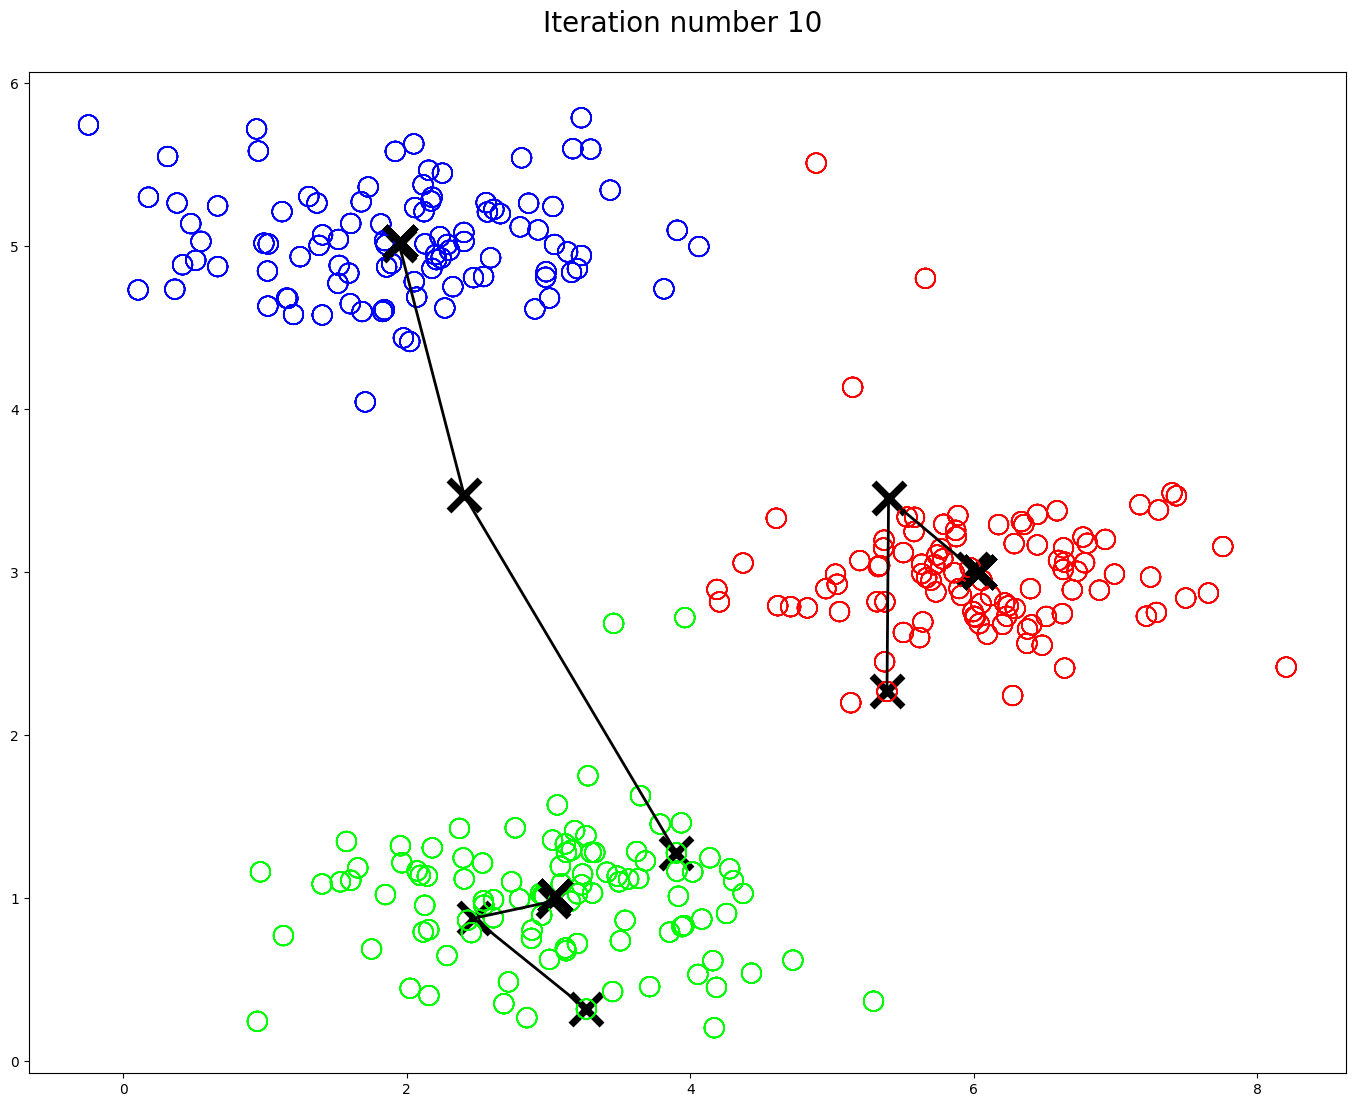

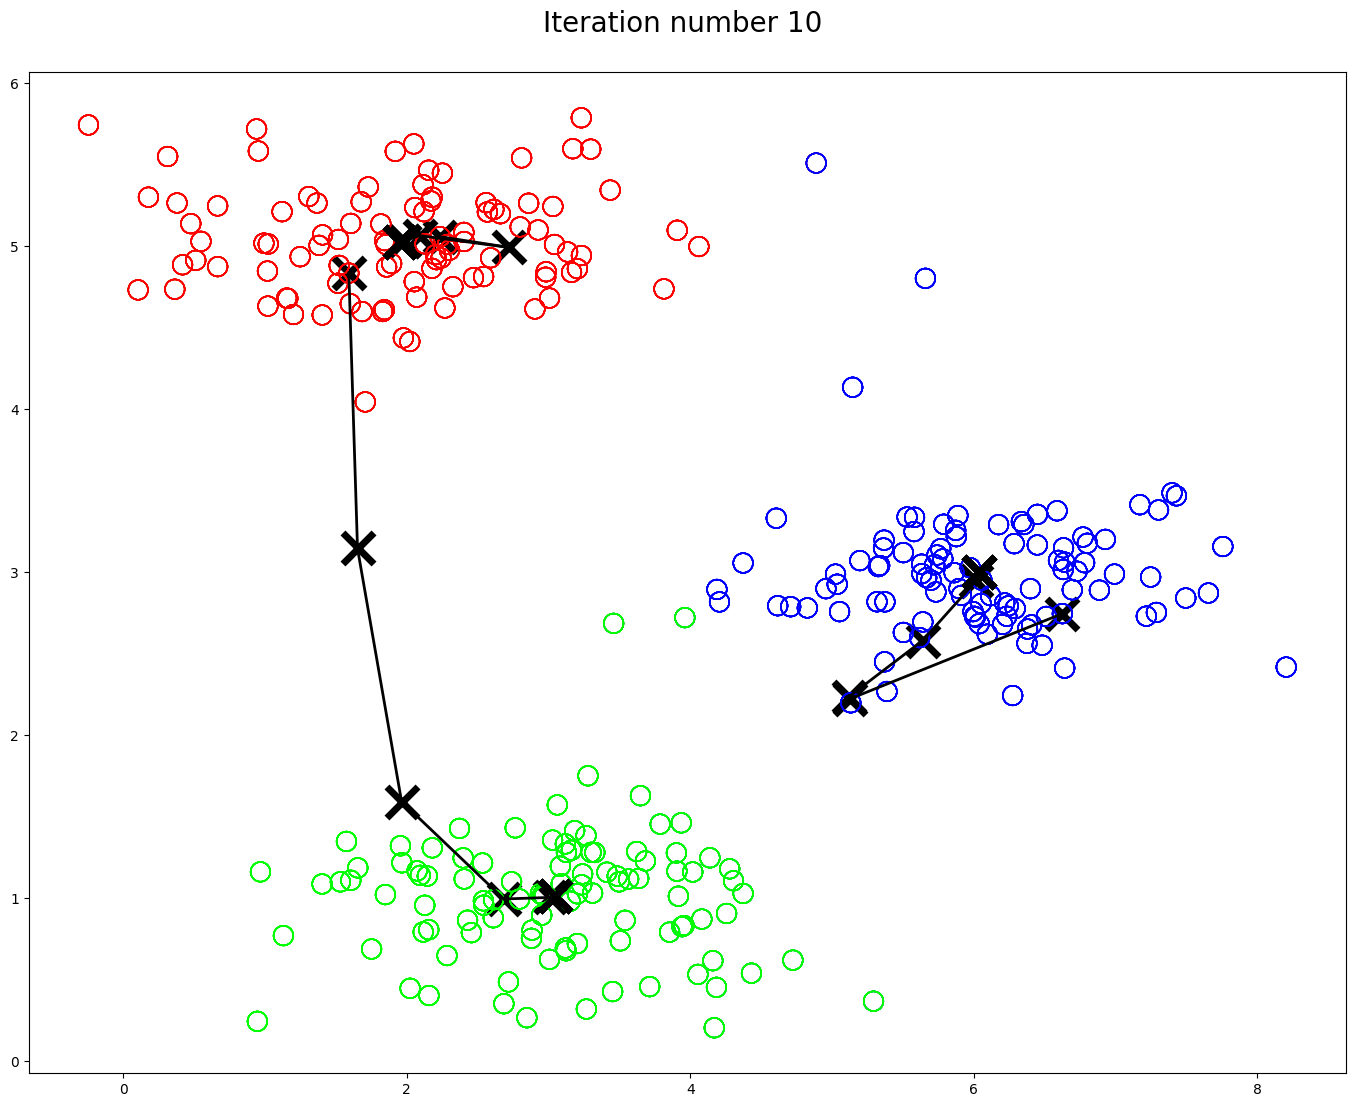

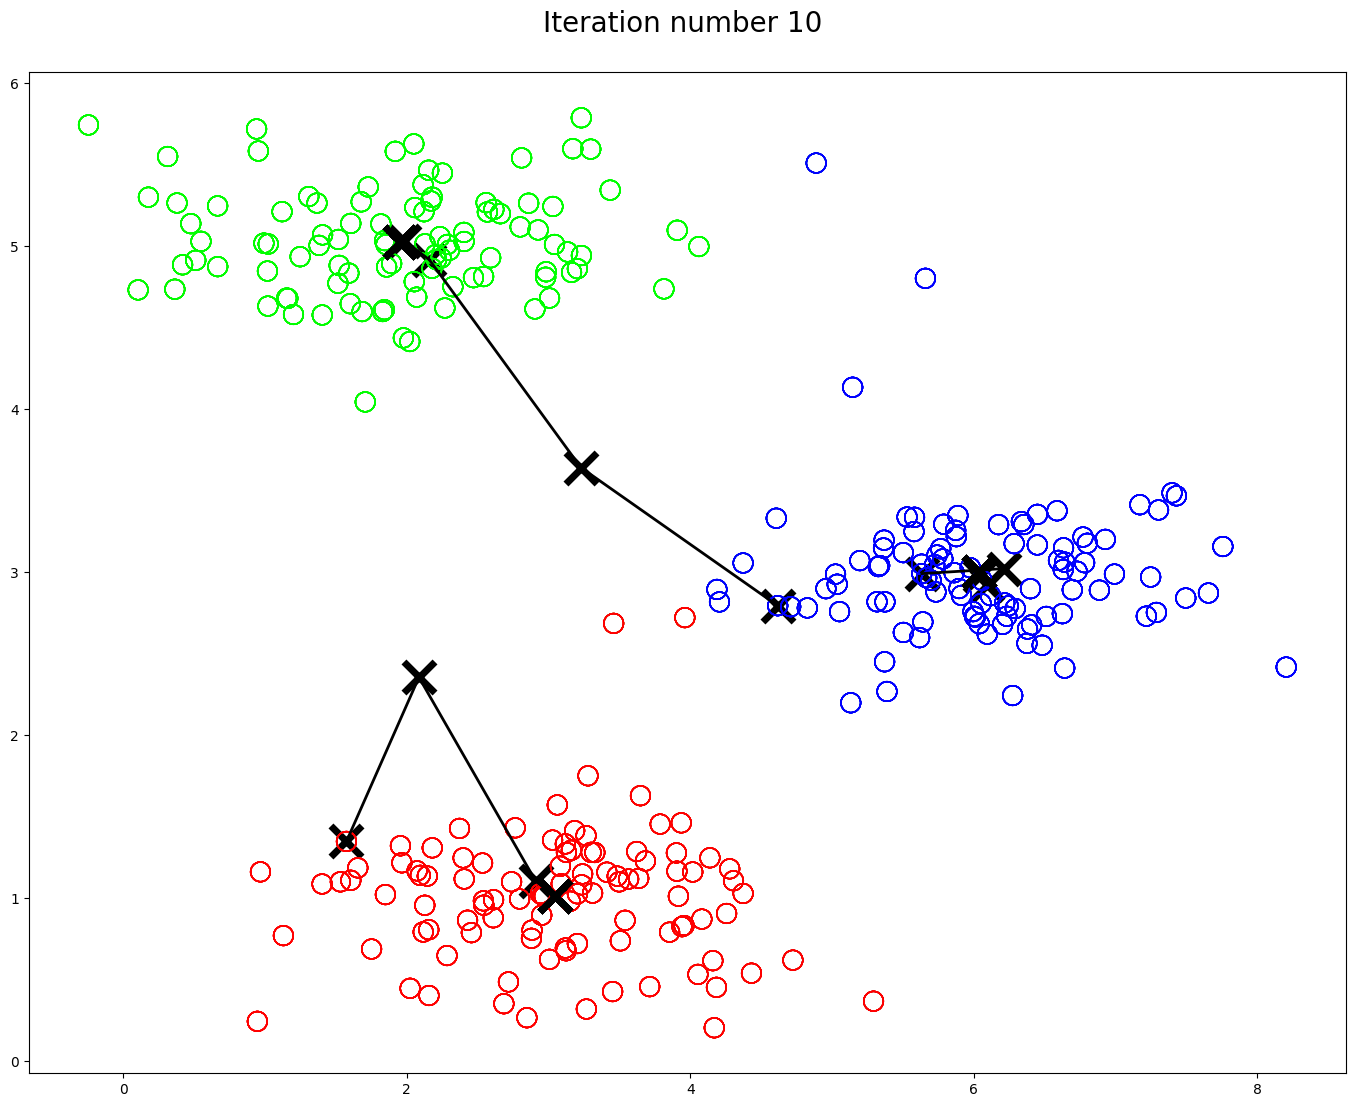

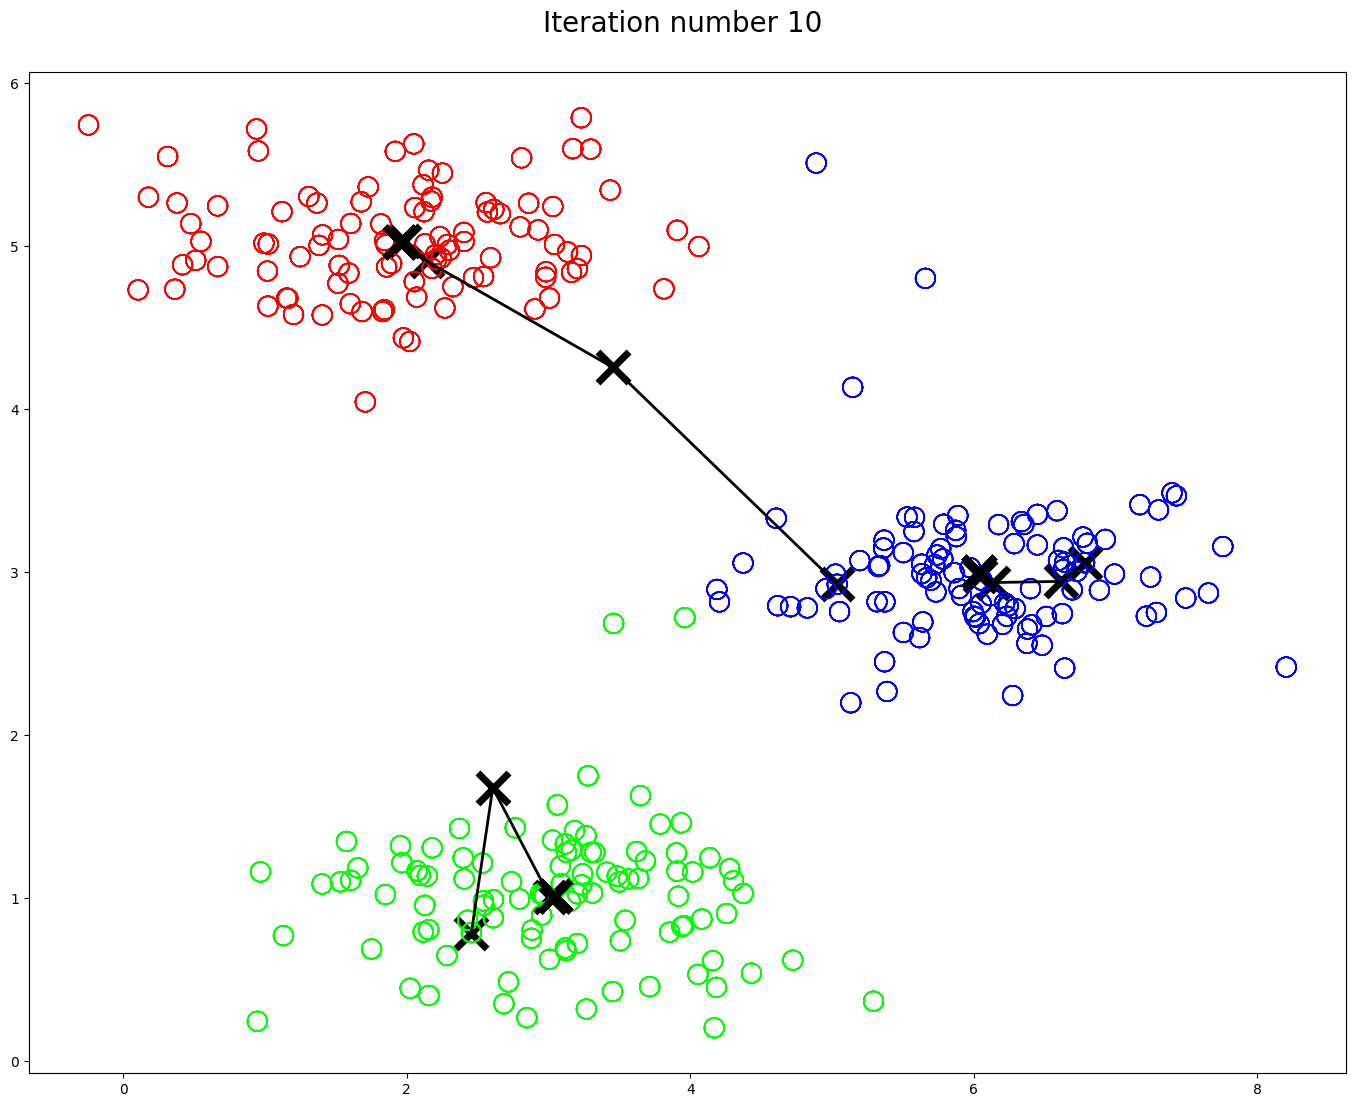

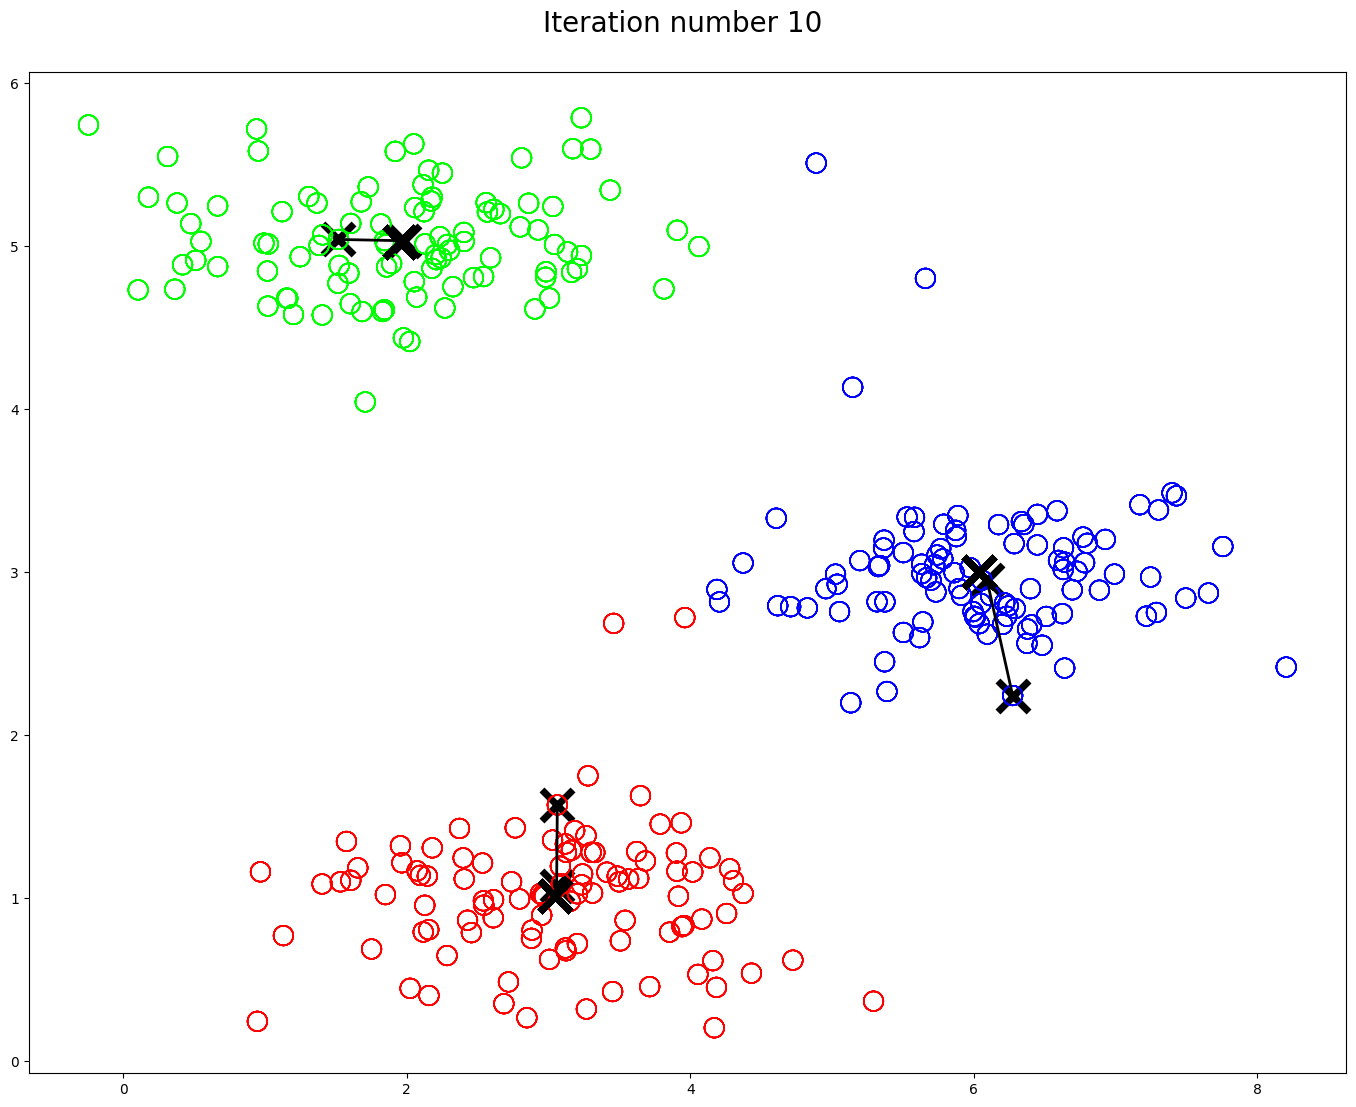

In [ ]:
for i in range(5):
    print(kMeansInitCentroids(x,3), '\n')
    centroids, idx = runkMeans(x, kMeansInitCentroids(x,3), max_iters)

## Часть 4: "K-means" кластеризация элементов изображения
  Терминология: пиксел (англ. pixel = picture element) обозначает элемент изображения ("элиз"). В данном упражнении, следует применить процедуру кластеризации методом k-средних для сжатия изображения. Для того, чтобы сделать это, "k-means" кластеризация производится в цветовом пространстве исходного изображения, а затем производится отображение на ближайшие центроиды в трансформированном цветовом пространстве.
  
Требуется подготовить код функции kMeansInitCentroids


Running K-Means clustering on pixels from an image.


K-Means iteration 50/50...

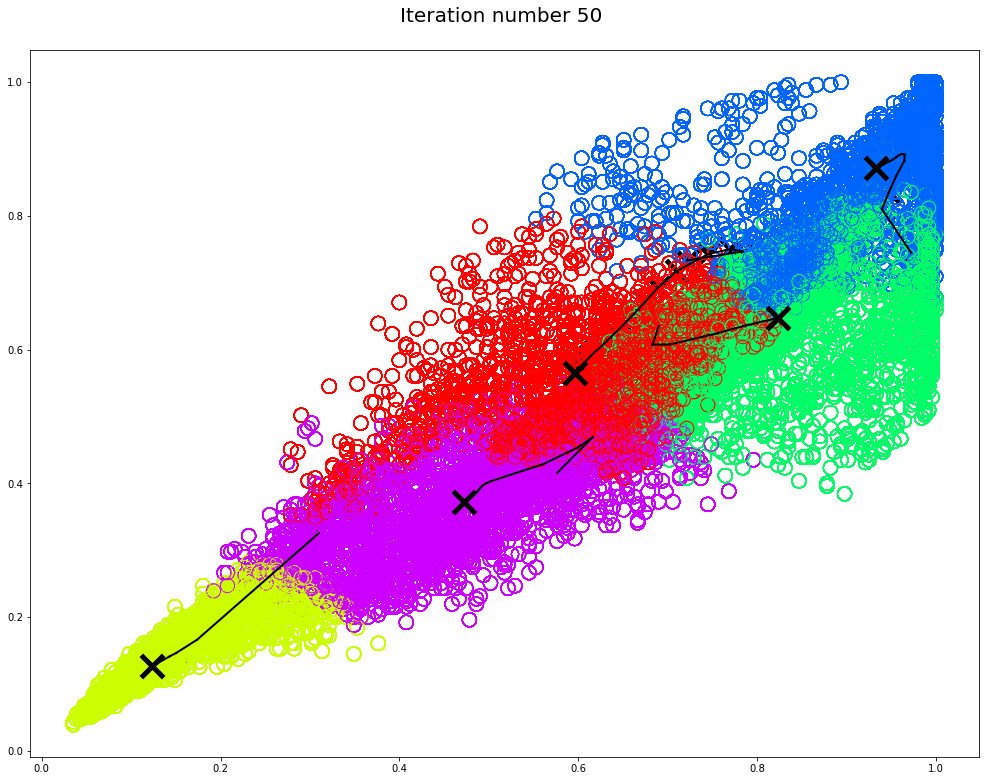

In [ ]:
print('\nRunning K-Means clustering on pixels from an image.\n\n')

# Загрузка изображения птицы
mat = scipy.io.loadmat('bird_small.mat')
A = mat["A"]

A = A / 255.0 # Осуществляется деление на 255 с целью нормировки всех данных в диапазоне от 0 до 1

# Размер изображения
img_size = A.shape

# Переопределение RGB изображения в матрицу Nx3, где N = количество элизов.
# Таким образом, каждая строка содержит сейчас значения компонент красного, зеленого и синего цветов
# В результате таких трансформаций, образована матрица X, которая будет использована в k-means.
X = A.reshape(img_size[0] * img_size[1], 3, order='F').copy()

# При  моделировании следует производить случайную начальную инициализацию центроидов.
# Необходимо запрограммировать kMeansInitCentroids.m перед обработкой
K = 5
max_iters = 50
initial_centroids = kMeansInitCentroids(X, K)

# Моделирование алгоритма
centroids, idx = runkMeans(X, initial_centroids, max_iters)


## Часть 5: Сжатие изображения
В этой части лабораторной работы Вы будете использовать
метод кластеризации k-средних для сжатия изображения.


Applying K-Means to compress an image.



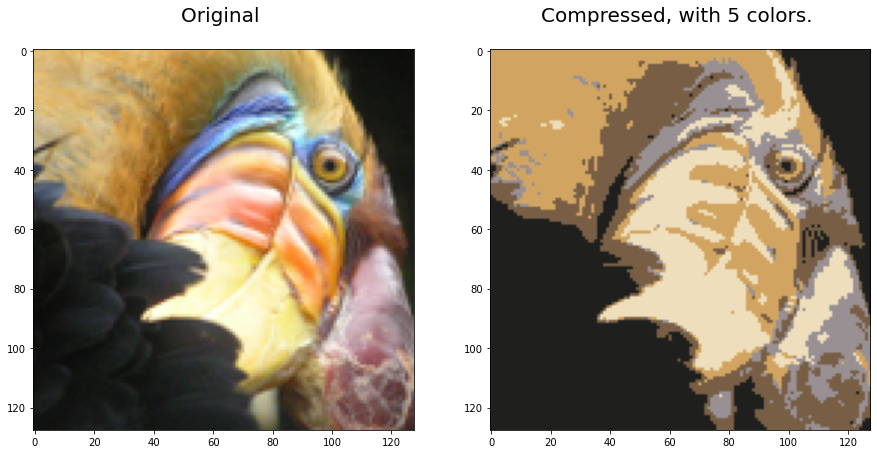

In [ ]:
print('\nApplying K-Means to compress an image.\n')

# Нахождение ближайших значений в кластере
idx = findClosestCentroids(X, centroids)

# Представление изображения X в терминах индексов в idx.

# Восстановление изображения производится посредством отображения каждой точки изображения
# (заданной посредством индексов в idx) на значения центроидов
X_recovered = centroids[idx,:]

# Преобразование формата изображения
X_recovered = X_recovered.reshape(img_size[0], img_size[1], 3, order='F')

# Отображение исходного изображения

plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title('Original \n', fontsize=20)

# Отображение сжатого изображения
plt.subplot(1, 2, 2)
plt.imshow(X_recovered)
plt.title( 'Compressed, with {:d} colors. \n'.format(K), fontsize=20)
plt.show(block=False)


Ваша задача сжать свое изображение


In [ ]:
# Ваш код здесь